# Transfer Analysis

In [10]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
file_path = "/Users/alipuccio/Desktop/apex/Venmito-apekshamalik/output_data/transfers_(linked).csv"
transfers_df = pd.read_csv(file_path)

# Display dataset

In [16]:
display(transfers_df.head())

,sender_id,recipient_id,amount,date,sender_first_name,sender_last_name,sender_country,recipient_first_name,recipient_last_name,recipient_country,month,weekday
0,926,531,70.47,2022-01-07,Ann,John,USA,Jake,Salazar,USA,January,Friday
1,280,735,21.88,2022-01-10,Zac,Wagner,USA,Shane,Wheeler,USA,January,Monday
2,571,737,44.68,2022-01-13,Keelan,Thompson,USA,Kiara,Bell,USA,January,Thursday
3,958,945,39.94,2022-01-17,Luna,Fowler,USA,Elisha,Owens,USA,January,Monday
4,373,817,6.98,2022-01-17,Robbie,Paul,USA,Renee,Mullen,USA,January,Monday


In [8]:

# Sample Data (Replace with your actual DataFrame)
# transfers_df = pd.read_csv("transfers.csv")

# Dropdown for selecting a sender country
sender_dropdown = widgets.Dropdown(
    options=transfers_df['sender_country'].unique(),
    description="Sender Country",
    value=transfers_df['sender_country'].unique()[0]
)

def update(sender_country):
    filtered_df = transfers_df[transfers_df['sender_country'] == sender_country]
    summary = filtered_df.groupby('recipient_country')['amount'].sum().sort_values(ascending=False)
    
    plt.figure(figsize=(10, 5))
    summary.plot(kind='bar', color='blue', alpha=0.7)
    plt.title(f"Total Amount Sent from {sender_country}")
    plt.ylabel("Amount Transferred")
    plt.xlabel("Recipient Country")
    plt.xticks(rotation=45)
    plt.show()

# Display the interactive dropdown
interactive_plot = widgets.interactive(update, sender_country=sender_dropdown)
display(interactive_plot)


interactive(children=(Dropdown(description='Sender Country', options=('USA', 'Canada', 'United Kingdom', 'Unkn…

# Seasonal trends for sending money

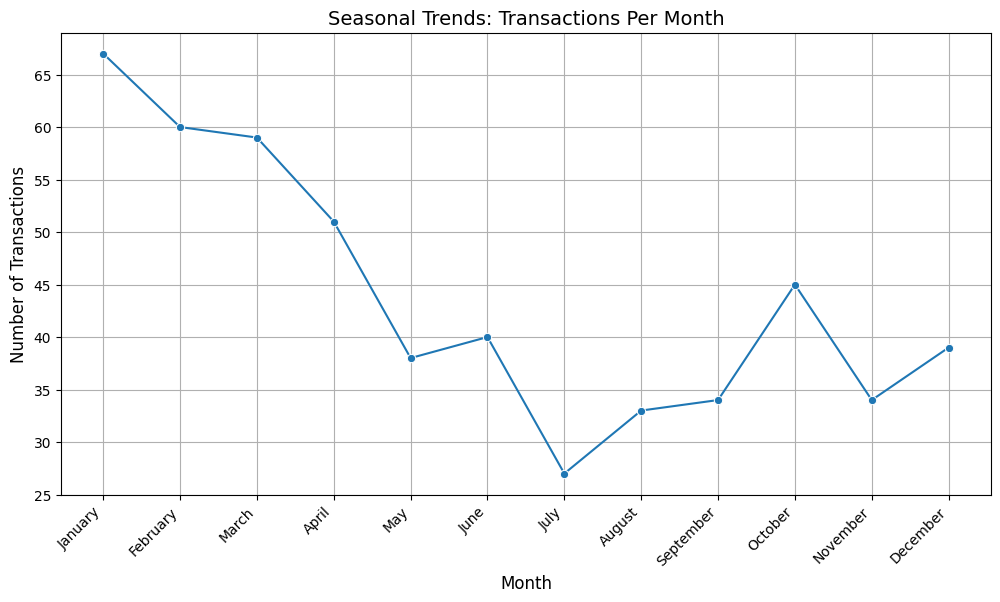

/var/folders/t8/nqklvy6x565bg7rjp1gqrcl40000gn/T/ipykernel_38111/3437175736.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_trends, x='weekday', y='transaction_count', palette='Set2')


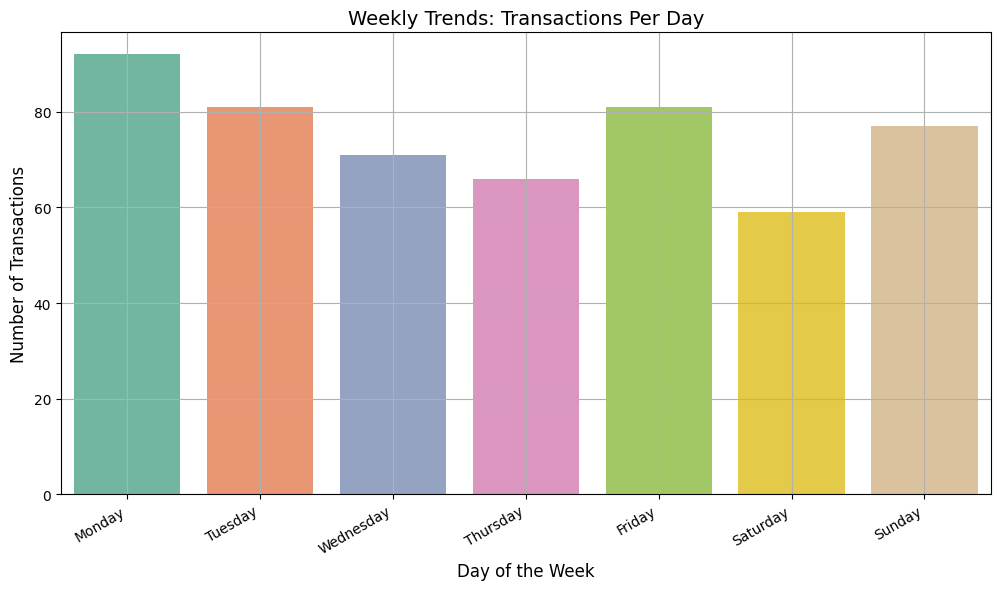

In [18]:
# Convert the 'date' column to datetime format
transfers_df['date'] = pd.to_datetime(transfers_df['date'])

# Extract month and weekday for seasonal trend analysis
transfers_df['month'] = transfers_df['date'].dt.month_name()
transfers_df['weekday'] = transfers_df['date'].dt.day_name()

# Aggregate transaction counts per month
monthly_trends = transfers_df.groupby('month').size().reset_index(name='transaction_count')

# Aggregate transaction counts per weekday
weekday_trends = transfers_df.groupby('weekday').size().reset_index(name='transaction_count')

# Order the months and weekdays properly
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

monthly_trends['month'] = pd.Categorical(monthly_trends['month'], categories=month_order, ordered=True)
weekday_trends['weekday'] = pd.Categorical(weekday_trends['weekday'], categories=weekday_order, ordered=True)

# Sort values for plotting
monthly_trends = monthly_trends.sort_values('month')
weekday_trends = weekday_trends.sort_values('weekday')

# Plot Monthly Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends, x='month', y='transaction_count', marker='o', linestyle='-')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.title("Seasonal Trends: Transactions Per Month", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.grid(True)
plt.show()

# Plot Weekday Trends
plt.figure(figsize=(12, 6))
sns.barplot(data=weekday_trends, x='weekday', y='transaction_count', palette='Set2')
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.title("Weekly Trends: Transactions Per Day", fontsize=14)
plt.xticks(rotation=30, ha="right")
plt.grid(True)
plt.show()
